In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("wines_SPA_train.csv")  # LOADING DATASETS THAT I PREVIOUSLY SPLITTED USING HASH PARTITIONING METHOD
test_df = pd.read_csv("wines_SPA_test.csv")
print(train_df.head())



                winery                   wine  year    rating  num_reviews  \
0  Pago de Carraovejas              El Anejon  2016  1.000000     0.382012   
1      Bodegas El Nido                El Nido  2018  1.000000     0.170971   
2        La Rioja Alta       Gran Reserva 890  1985  1.000000     0.000890   
3  Pago de Carraovejas  Cuesta de Las Liebres  2014  0.833333     0.587711   
4  Pago de Carraovejas              El Anejon  2015  0.833333     0.461264   

  country            region     price                  type  body  acidity  
0  Espana  Ribera del Duero  0.432415  Ribera Del Duero Red   1.0      0.0  
1  Espana           Jumilla  0.825027                   Red   0.5      0.0  
2  Espana             Rioja  0.910566             Rioja Red   0.5      0.0  
3  Espana  Ribera del Duero  0.467260  Ribera Del Duero Red   1.0      0.0  
4  Espana  Ribera del Duero  0.302018  Ribera Del Duero Red   1.0      0.0  
                winery                       wine  year    rating  \


In [11]:
print(test_df.head())

                winery                       wine  year    rating  \
0  Pago de Carraovejas      Cuesta de Las Liebres  2015  1.000000   
1      Bodegas El Nido                    El Nido  2014  0.833333   
2   Vinedos de Paganos                   La Nieta  2015  0.833333   
3          Emilio Moro  Malleolus de Valderramiro  2016  0.833333   
4    Bodegas San Roman     Cartago Paraje de Pozo  2015  0.833333   

   num_reviews country            region     price                  type  \
0     0.308994  Espana  Ribera del Duero  0.697245  Ribera Del Duero Red   
1     0.432769  Espana           Jumilla  0.648297                   Red   
2     0.255565  Espana             Rioja  0.334476             Rioja Red   
3     0.244880  Espana  Ribera del Duero  0.344760  Ribera Del Duero Red   
4     0.099733  Espana              Toro  0.318507              Toro Red   

   body  acidity  
0   1.0      0.0  
1   0.5      0.0  
2   0.5      0.0  
3   1.0      0.0  
4   1.0      0.0  


In [45]:
# Selecting multiple features
feature_columns = ["num_reviews", "price", "body", "acidity"]  # INPUT COLUMNS
target_column = "rating"  # OUTPUT COLUMN

X_train = train_df[feature_columns].values
y_train = train_df[target_column].values

X_test = test_df[feature_columns].values
y_test = test_df[target_column].values


In [48]:
class MeraMLR:          # Works both for MLR and SLR

    def __init__(self): #constructor
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1) #adding 1's

        # calcuate the coeffs
        # Use pseudo-inverse instead of the standard inverse
        # to handle potential singularity issues.
        # betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train #formula  <-- Original line causing the error
        betas = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train # Using pseudo-inverse (pinv)
        self.intercept_ = betas[0] #all beta nots
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_         # y hat=(beta1x1+beta2x2+.....betanxn)+beta not
        return y_pred

In [50]:
mlr = MeraMLR()


In [51]:
mlr.fit(X_train,y_train)

In [41]:
X_train.shape

(1062, 4)

In [52]:
np.insert(X_train,0,1,axis=1) #with added 1's

array([[1.00000000e+00, 3.82012467e-01, 4.32414841e-01, 1.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.70970614e-01, 8.25026598e-01, 5.00000000e-01,
        0.00000000e+00],
       [1.00000000e+00, 8.90471950e-04, 9.10566283e-01, 5.00000000e-01,
        0.00000000e+00],
       ...,
       [1.00000000e+00, 3.26803206e-01, 6.28335865e-02, 5.00000000e-01,
        0.00000000e+00],
       [1.00000000e+00, 3.25022262e-01, 8.22304187e-02, 5.00000000e-01,
        0.00000000e+00],
       [1.00000000e+00, 3.19679430e-01, 2.92905186e-01, 5.00000000e-01,
        0.00000000e+00]])

In [53]:
np.insert(X_train,0,1,axis=1).shape

(1062, 5)

In [58]:
y_pred = mlr.predict(X_test)

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2_score(y_test,y_pred)

0.22169048264670266

In [61]:
mlr.coef_       # 4 cols ==> 4 slopes

array([-0.20099441,  0.39979443,  0.11612137,  0.        ])

In [62]:
mlr.intercept_

np.float64(0.16083531841351442)

In [30]:
#Working is same as sklearn model

price          0.454117
body           0.152240
num_reviews   -0.276455
acidity             NaN
Name: rating, dtype: float64
price          0.454117
body           0.152240
num_reviews   -0.276455
acidity             NaN
Name: rating, dtype: float64


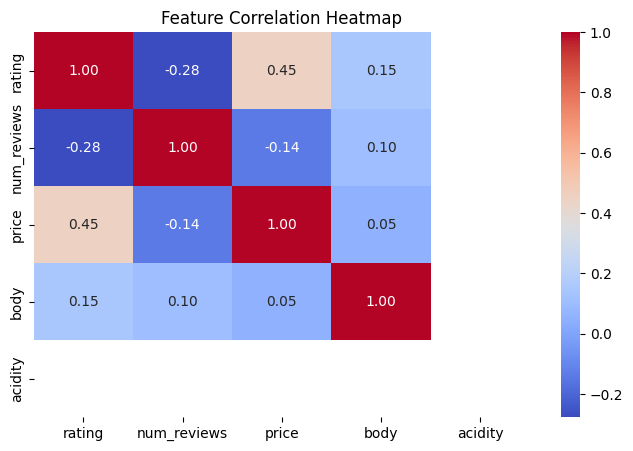

In [35]:
# NOW LETS USE SIMPLE LINEAR REGRESSION ON THE BEST FEATURE..
#FIND CORRELATION OF RATING COL WITH OTHERS

numeric_train_df = train_df.select_dtypes(include=[np.number])  #ONLY NUMERIC COLUMNS
correlation = numeric_train_df.corr()["rating"].drop("rating").sort_values(ascending=False)
print(correlation)

print(correlation)
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [36]:
class MeraLR:

    def __init__(self):             #Constructor
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):

            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))       #(yi-ybar)(xi-xbar) for every student
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())       # (ybar- m*xbar) for every student
        print(self.m)
        print(self.b)

    def predict(self,X_test):

        print(X_test)

        return self.m * X_test + self.b

In [63]:
lr = MeraLR()

In [67]:
X_train = train_df[feature_columns]
X_train=X_train["price"].values

In [70]:
X_test = test_df[feature_columns]
X_test=X_test["price"].values

In [68]:
lr.fit(X_train,y_train) # VALUES OF M AND B

0.4394242027145819
0.18334539894078206


In [71]:
y_pred=[]
for i in range(X_test.shape[0]):
    y_pred.append(lr.predict(X_test[i]))

0.6972445215881969
0.64829681058798
0.3344760251681493
0.3447602516814927
0.3185072683879367
0.5587329138641787
0.3619006292037318
0.9828596224777608
0.9047515730093296
0.8656975482751139
0.1928834888262096
0.4057279236276849
0.279453243653721
0.2577565632458234
0.1670644391408114
0.1931004556302885
0.5256671729225428
0.3276198741592536
0.5011933174224343
0.2623128661314819
0.1034931655456715
0.089824256888696
0.8873942286830114
0.0282056845302668
0.531568669993491
0.3449772184855717
0.4376220438272944
0.4617053590800608
0.2796702104578
0.1920156216098937
0.1397266218268605
0.2102408331525276
0.1625081362551529
0.504833860932558
0.4920373182903015
0.6248643957474506
0.7379908873942286
0.8748535474072467
0.1909307875894988
0.2581904968539813
0.3883705793013669
0.8136255152961597
0.2560208288131916
0.2108483402039488
0.2955955738771968
0.6043827294423952
0.3788240399218919
0.1883271859405511
0.1928834888262096
0.968236059882838
0.9694076806248644
0.5482751139075721
0.6200477326968973
0.8

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.16755853921064834

In [73]:
#Accuracy is not good as we took only one feature